In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings

# 2) Loading data


In [2]:
df=pd.read_csv("Data\loan_data.csv")

# 3) data understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [6]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [7]:
dff=df.groupby(["not.fully.paid"])

In [8]:
dff[["not.fully.paid"]].count().apply(lambda X:X/X.sum())

,not.fully.paid
not.fully.paid,
0,0.839946
1,0.160054


In [9]:
df.groupby(["not.fully.paid"]).count().apply(lambda X:X/X.sum())

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,,
0,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946,0.839946
1,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054,0.160054


#  4)  Data preprocessing
here column purpose is a categorical column lets convert it to numerical one using one hot encoding

In [10]:
#checking categorical columns
category_col = df.select_dtypes(include=np.object_)
category_col

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
...,...
9573,all_other
9574,all_other
9575,debt_consolidation
9576,home_improvement


In [11]:
numerical_col = df.select_dtypes(exclude=np.object0)
numerical_col.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
#one hot encoding to convert categorical to numerical col
df_afterDummies=pd.get_dummies(data=df,prefix='pur_',columns=['purpose'])
df_afterDummies


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,pur__all_other,pur__credit_card,pur__debt_consolidation,pur__educational,pur__home_improvement,pur__major_purchase,pur__small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [13]:
df_afterDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   credit.policy            9578 non-null   int64  
 1   int.rate                 9578 non-null   float64
 2   installment              9578 non-null   float64
 3   log.annual.inc           9578 non-null   float64
 4   dti                      9578 non-null   float64
 5   fico                     9578 non-null   int64  
 6   days.with.cr.line        9578 non-null   float64
 7   revol.bal                9578 non-null   int64  
 8   revol.util               9578 non-null   float64
 9   inq.last.6mths           9578 non-null   int64  
 10  delinq.2yrs              9578 non-null   int64  
 11  pub.rec                  9578 non-null   int64  
 12  not.fully.paid           9578 non-null   int64  
 13  pur__all_other           9578 non-null   uint8  
 14  pur__credit_card        

In [14]:
#checking for null values
df_afterDummies.isna().sum()

credit.policy              0
int.rate                   0
installment                0
log.annual.inc             0
dti                        0
fico                       0
days.with.cr.line          0
revol.bal                  0
revol.util                 0
inq.last.6mths             0
delinq.2yrs                0
pub.rec                    0
not.fully.paid             0
pur__all_other             0
pur__credit_card           0
pur__debt_consolidation    0
pur__educational           0
pur__home_improvement      0
pur__major_purchase        0
pur__small_business        0
dtype: int64

In [15]:
print(df_afterDummies.shape)

(9578, 20)


# 5) EDA


<AxesSubplot:xlabel='installment', ylabel='not.fully.paid'>

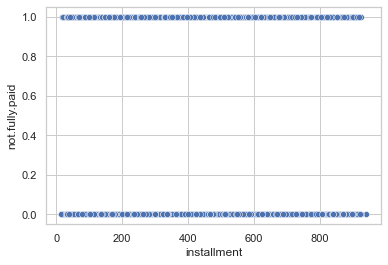

In [16]:
sns.set(style='whitegrid')
sns.scatterplot(y=df_afterDummies['not.fully.paid'],x=df['installment'])

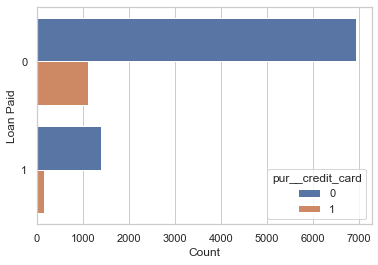

In [17]:
#will check visually how imbalance the target variable is 

%matplotlib inline

sns.countplot(y=df_afterDummies['not.fully.paid'],data=df_afterDummies,hue=df_afterDummies['pur__credit_card'])
plt.xlabel(xlabel='Count')
plt.ylabel(ylabel='Loan Paid')
plt.show()

<AxesSubplot:xlabel='not.fully.paid', ylabel='Count'>

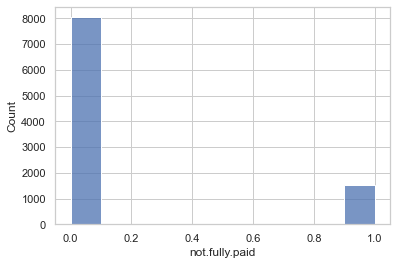

In [18]:
sns.histplot(data=df_afterDummies,x='not.fully.paid',bins=10)

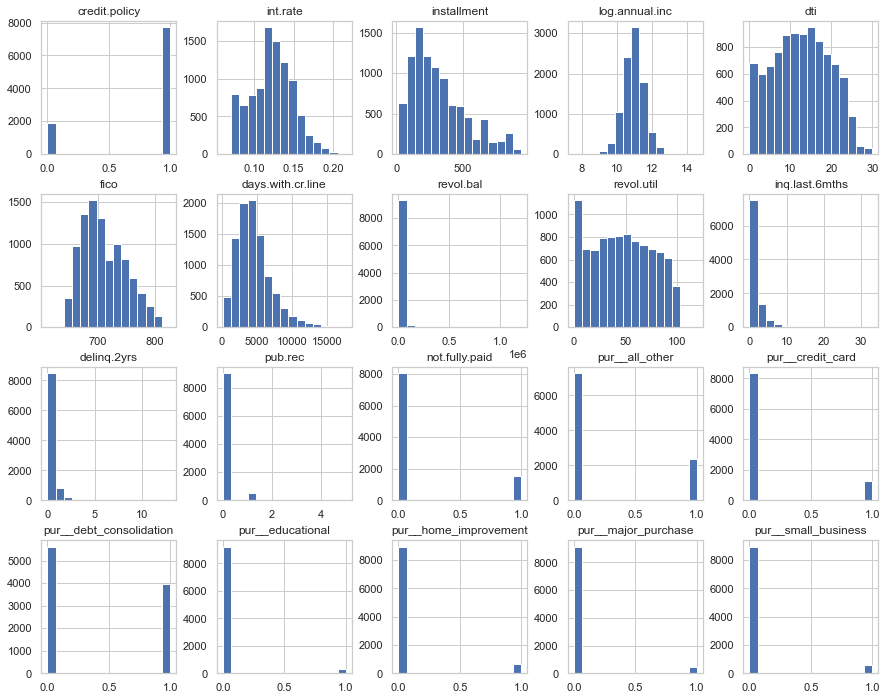

In [22]:
df_afterDummies.hist(figsize=(15,12),bins=15,layout=(4,5))

plt.show()

c:\users\maste\documents\personal\numyard ml\virenv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\maste\documents\personal\numyard ml\virenv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


IndexError: index 4 is out of bounds for axis 0 with size 4

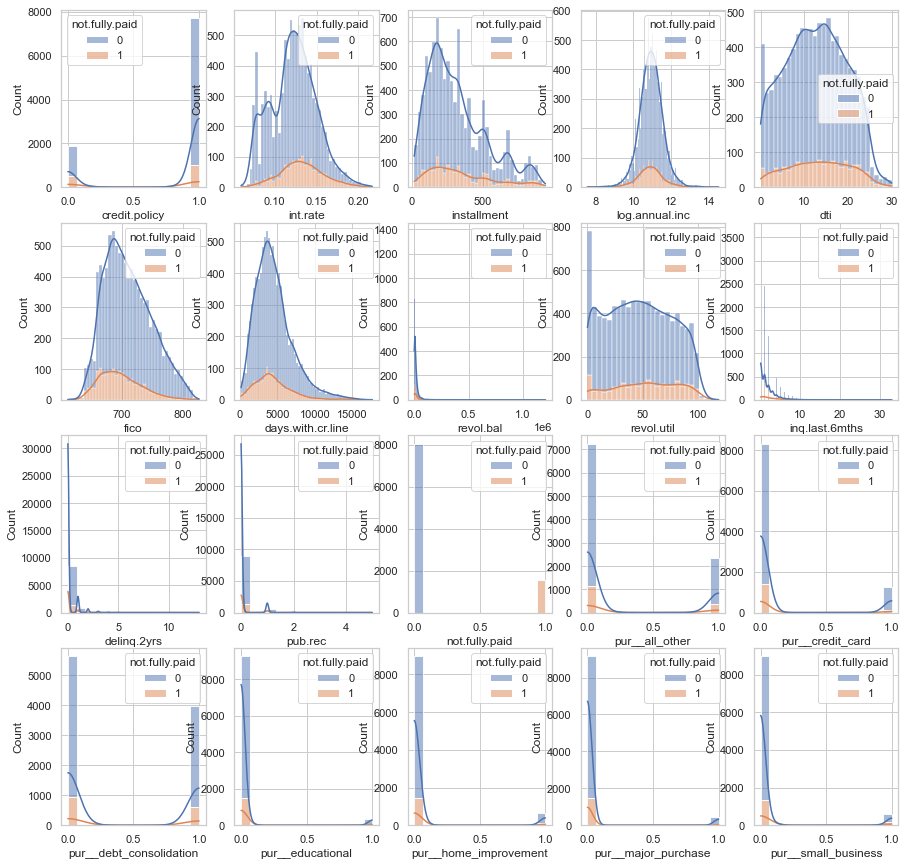

In [20]:
#box plot to check not fully paid against each feature

fig,ax=plt.subplots(nrows=4,ncols=5,figsize=(15,15))
row=0
col=0
for i in range(len(df_afterDummies)-1):
    if col>4:
        row +=1
        col=0
    axi=ax[row,col]
    sns.histplot(data=df_afterDummies,x=df_afterDummies[df_afterDummies.columns[i]],ax=axi,kde=True,hue=df_afterDummies['not.fully.paid'],multiple="stack",color='r')
    col +=1
plt.show()

In [27]:
#will use random sample for class imbalance
from imblearn.over_sampling import RandomOverSampler
oversampler= RandomOverSampler()
X= df_afterDummies.drop(['not.fully.paid'],axis=1)
y=df_afterDummies['not.fully.paid']
X_oversampled,y_oversampled = oversampler.fit_resample(X,y)

In [29]:
y_oversampled.value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [32]:
X_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16090 entries, 0 to 16089
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   credit.policy            16090 non-null  int64  
 1   int.rate                 16090 non-null  float64
 2   installment              16090 non-null  float64
 3   log.annual.inc           16090 non-null  float64
 4   dti                      16090 non-null  float64
 5   fico                     16090 non-null  int64  
 6   days.with.cr.line        16090 non-null  float64
 7   revol.bal                16090 non-null  int64  
 8   revol.util               16090 non-null  float64
 9   inq.last.6mths           16090 non-null  int64  
 10  delinq.2yrs              16090 non-null  int64  
 11  pub.rec                  16090 non-null  int64  
 12  pur__all_other           16090 non-null  uint8  
 13  pur__credit_card         16090 non-null  uint8  
 14  pur__debt_consolidatio

# 6 Model Building

In [33]:
#modeling on imbalance data 
X=df_afterDummies.drop(['not.fully.paid'],axis=1)
y=df_afterDummies['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=500)

In [48]:
#decison tree with criterion GINI
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
y_predict= clf.predict(X_test)

#accuracy report using confusion matrix 
from sklearn.metrics import confusion_matrix
print("Confusion matrix is: \n",confusion_matrix(y_test,y_predict))

from sklearn.metrics import accuracy_score
print("accuracy score:\n",accuracy_score(y_test,y_predict))
print("Score is:",clf.score(X_test,y_test))

from sklearn.metrics import classification_report
print("classification report \n",classification_report(y_test,y_predict))

Confusion matrix is: 
 [[2018  374]
 [ 369  113]]
accuracy score:
 0.7414752957550452
Score is: 0.7414752957550452
classification report 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2392
           1       0.23      0.23      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



In [49]:
y_test.value_counts()

0    2392
1     482
Name: not.fully.paid, dtype: int64

In [52]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)
print("confusion matrix for entropy \n",confusion_matrix(y_test,y_predict))
print("classfication report \n",classification_report(y_test,y_predict))
print("Accuracy score :",accuracy_score(y_test,y_predict))

confusion matrix for entropy 
 [[2034  358]
 [ 396   86]]
classfication report 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2392
           1       0.19      0.18      0.19       482

    accuracy                           0.74      2874
   macro avg       0.52      0.51      0.51      2874
weighted avg       0.73      0.74      0.73      2874

Accuracy score : 0.7376478775226165


In [53]:
#modeling after correcting imbalance 

X_train,X_test,y_train,y_test=train_test_split(X_oversampled,y_oversampled,test_size=0.3,random_state=500)

In [54]:
#decison tree with criterion GINI
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
y_predict= clf.predict(X_test)

#accuracy report using confusion matrix 
from sklearn.metrics import confusion_matrix
print("Confusion matrix is: \n",confusion_matrix(y_test,y_predict))

from sklearn.metrics import accuracy_score
print("accuracy score:\n",accuracy_score(y_test,y_predict))
print("Score is:",clf.score(X_test,y_test))

from sklearn.metrics import classification_report
print("classification report \n",classification_report(y_test,y_predict))

Confusion matrix is: 
 [[1974  514]
 [  40 2299]]
accuracy score:
 0.885228920654651
Score is: 0.885228920654651
classification report 
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      2488
           1       0.82      0.98      0.89      2339

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.88      4827
weighted avg       0.90      0.89      0.88      4827



In [55]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)
print("confusion matrix for entropy \n",confusion_matrix(y_test,y_predict))
print("classfication report \n",classification_report(y_test,y_predict))
print("Accuracy score :",accuracy_score(y_test,y_predict))

confusion matrix for entropy 
 [[1954  534]
 [  36 2303]]
classfication report 
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      2488
           1       0.81      0.98      0.89      2339

    accuracy                           0.88      4827
   macro avg       0.90      0.88      0.88      4827
weighted avg       0.90      0.88      0.88      4827

Accuracy score : 0.8819142324425109


In [69]:
#further improving the model and by using hypertuning, like deciding leafs, depths

from sklearn.model_selection import GridSearchCV
dtclf= DecisionTreeClassifier()
paramgrid={'criterion':['gini','entropy'],
           'max_depth':[10,15,20,30,35,40,50]}
grid = GridSearchCV(dtclf,paramgrid,refit=True,verbose=3,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...................criterion=gini, max_depth=10; total time=   0.0s
[CV 2/5] END ...................criterion=gini, max_depth=10; total time=   0.0s
[CV 3/5] END ...................criterion=gini, max_depth=10; total time=   0.0s
[CV 4/5] END ...................criterion=gini, max_depth=10; total time=   0.0s
[CV 5/5] END ...................criterion=gini, max_depth=10; total time=   0.0s
[CV 1/5] END ...................criterion=gini, max_depth=15; total time=   0.0s
[CV 2/5] END ...................criterion=gini, max_depth=15; total time=   0.0s
[CV 3/5] END ...................criterion=gini, max_depth=15; total time=   0.1s
[CV 4/5] END ...................criterion=gini, max_depth=15; total time=   0.0s
[CV 5/5] END ...................criterion=gini, max_depth=15; total time=   0.1s
[CV 1/5] END ...................criterion=gini, max_depth=20; total time=   0.1s
[CV 2/5] END ...................criterion=gini, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 35, 40, 50]},
             scoring='accuracy', verbose=3)

In [70]:
grid.best_estimator_
grid.best_params_



{'criterion': 'entropy', 'max_depth': 40}

In [76]:
grid_pred=grid.predict(X_test)
confusion_matrix(y_test,grid_pred)
accuracy_score(y_test,grid_pred)
classification_report(y_test,grid_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.79      0.87      2488\n           1       0.81      0.99      0.89      2339\n\n    accuracy                           0.88      4827\n   macro avg       0.90      0.89      0.88      4827\nweighted avg       0.90      0.88      0.88      4827\n'